## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set
from model.logistic import LogisticRegression


In [2]:
#Q5 - (a) - added in logistic.py
def select_binarydata(dataset, class_a,class_b):
    Data, labels = dataset
    print(np.shape(Data),np.shape(labels))
    #only save class a, and class b.
    idx_class_a = np.where(labels == class_a)
    idx_class_b = np.where(labels == class_b)
    Data_class_a = Data[idx_class_a]
    Data_class_b = Data[idx_class_b]

    Data_ = np.concatenate([Data_class_a,Data_class_b])
    label_ = np.concatenate([labels[idx_class_a],labels[idx_class_b]])
    return   Data_ ,label_
    # Image : (cnt, 32x32 byte = 1024) in one img data , 1 byte in one image data


#Q5 - (b) - Evaluate the model on Speed limit 100km/h vs 120km/h using the unaligned dataset

(34799, 1024) (34799,)
[[ 93  93  94 ... 107 104 102]
 [131 131 131 ...  18  18  19]
 [ 51  54  55 ...  20  23  32]
 ...
 [ 16  16  16 ...  17  18  18]
 [ 45  43  46 ...  91  80  54]
 [ 20  19  19 ...  18  19  20]]
(2040, 1024)


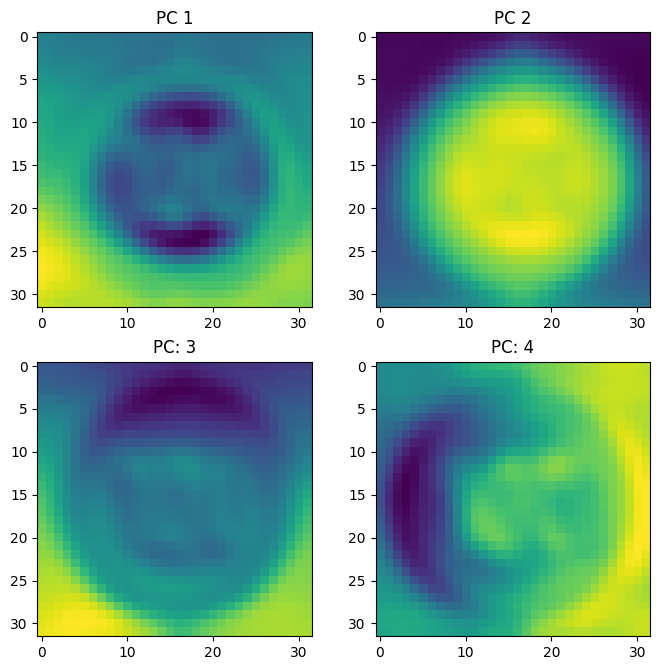

In [36]:
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(False) # check true and false
load_data_binary = select_binarydata(load_data,7,8)
#data splits 80/10/10
train_data, train_label, valid_data, valid_label, test_data, test_label = generate_no_fold_set(load_data_binary,10)
print(train_data)
pca = PCA(train_data, n_components)
projected = pca.PCA_Emmet()
pca.plot_PC()


In [3]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
train_l = np.copy(train_label)//8 # 7 or 8
valid_l = np.copy(valid_label)//8 # 7 or 8

Alpha = 0.01
w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)
#weight
train_d = projected 
valid_d = pca.PCA_generate(valid_data)
test_d = pca.PCA_generate(test_data)
for epoch in range(1000):
    #logistic model 
    train_y = logistic.logistic_model(w, train_d)
    #loss check
    train_loss = logistic.loss_binary(train_y, train_l)
    #gradient check
    train_loss_record.append(train_loss)
    train_accuracy = logistic.check_accuracy(train_y, train_l)
    train_accuracy_record.append(train_accuracy)
    #process for validation sets only checking the accuray, not updating the weight
    holdout_y = logistic.logistic_model(w,valid_d)
    holdout_loss = logistic.loss_binary(holdout_y, valid_l)
    holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
    holdout_loss_record.append(holdout_loss)
    holdout_accuracy_record.append(holdout_accuracy)
    #evaluate best option for test sets
    '''
    if max(holdout_accuracy_record[0]) == holdout_accuracy:
        test_y = logistic.logistic_model(pjt_test_data)
        test_accuracy_record = logistic.check_accuracy(test_y, test_labels)
    '''
    #update the weight
    w = logistic.update_weight(w,train_d, train_y, train_l)
    
    
    print(f' train accuracy, loss: {train_accuracy,train_loss }')
plt.figure(1)
plt.plot('loss', train_loss_record[0], holdout_loss_record[0])
plt.figure(2)
plt.plot('accuracy', train_accuracy_record[0], holdout_accuracy_record[0])

NameError: name 'train_label' is not defined

#Q5 - (c) - Evaluate the model on Speed limit 100km/h vs 120km/h using the aligned dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set
from model.logistic import LogisticRegression

#Q5 - (a) - added in logistic.py
def select_binarydata(dataset, class_a,class_b):
    Data, labels = dataset
    print(np.shape(Data),np.shape(labels))
    #only save class a, and class b.
    idx_class_a = np.where(labels == class_a)
    idx_class_b = np.where(labels == class_b)
    Data_class_a = Data[idx_class_a]
    Data_class_b = Data[idx_class_b]

    Data_ = np.concatenate([Data_class_a,Data_class_b])
    label_ = np.concatenate([labels[idx_class_a],labels[idx_class_b]])
    return   Data_ ,label_
    # Image : (cnt, 32x32 byte = 1024) in one img data , 1 byte in one image data

    
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(True) # check true and false
load_data_binary = select_binarydata(load_data,7,8)
#data splits 80/10/10


(34799, 1024) (34799,)


**********
(2040, 1024)


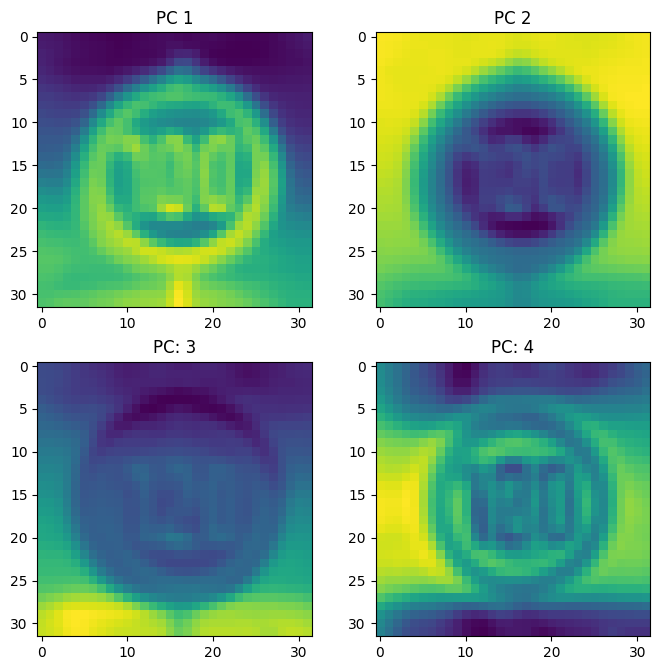

 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(2805, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(3060, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(3315, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(3570, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(3825, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********


KeyboardInterrupt: 

In [10]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
Alpha = 0.01
w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)

#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    n_components = 100
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test
    
    train_l = np.copy(train_label)//8
    valid_l = np.copy(valid_data)//8
    test_l = np.copy(test_data)//8
    
    pca = PCA(train_data, n_components)
    projected = pca.PCA_Emmet()
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.PCA_generate(valid_data)
    test_d = pca.PCA_generate(test_data)
    '''
    for epoch in range(300):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record.append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        
        if max(holdout_accuracy_record[k]) == holdout_accuracy:
            test_y = logistic.logistic_model(test_d)
            test_accuracy_record = logistic.check_accuracy(test_y, test_l)
        
        #update the weight
        w = logistic.update_weight(w,train_d, train_y, train_l)
    '''
    
    print(f' train accuracy, loss: {train_accuracy,train_loss }')
plt.figure(1)
plt.plot('loss', train_loss_record[0], holdout_loss_record[0])
plt.figure(2)
plt.plot('accuracy', train_accuracy_record[0], holdout_accuracy_record[0])

In [ ]:
##Q5 - (d) - Evaluate the model on Curve Left(19) vs Right(20) using the aligned dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set
from model.logistic import LogisticRegression

#Q5 - (a) - added in logistic.py
def select_binarydata(dataset, class_a,class_b):
    Data, labels = dataset
    print(np.shape(Data),np.shape(labels))
    #only save class a, and class b.
    idx_class_a = np.where(labels == class_a)
    idx_class_b = np.where(labels == class_b)
    Data_class_a = Data[idx_class_a]
    Data_class_b = Data[idx_class_b]

    Data_ = np.concatenate([Data_class_a,Data_class_b])
    label_ = np.concatenate([labels[idx_class_a],labels[idx_class_b]])
    return   Data_ ,label_
    # Image : (cnt, 32x32 byte = 1024) in one img data , 1 byte in one image data

    
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(True) # check true and false
load_data_binary = select_binarydata(load_data,19,20)


(34799, 1024) (34799,)


**********
(384, 1024)


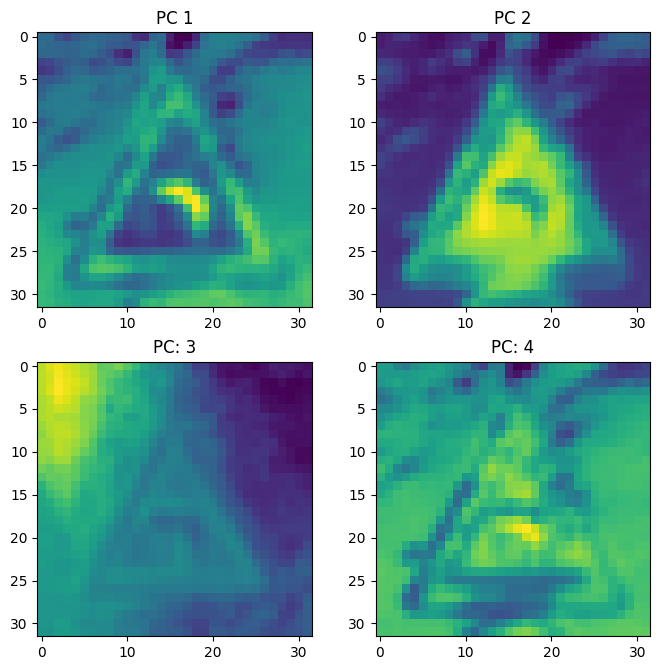

 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(528, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(576, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(624, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(672, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(720, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(768, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(816, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(864, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)
**********
(912, 1024)
 train accuracy, loss: (0.49901960784313726, 1540.4063773896346)


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

In [13]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
Alpha = 0.01
w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)

#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    n_components = 100
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test
    
    train_l = np.copy(train_label)//8
    valid_l = np.copy(valid_data)//8
    test_l = np.copy(test_data)//8
    
    pca = PCA(train_data, n_components)
    projected = pca.PCA_Emmet()
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.PCA_generate(valid_data)
    test_d = pca.PCA_generate(test_data)
    '''
    for epoch in range(300):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record.append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        
        if max(holdout_accuracy_record[k]) == holdout_accuracy:
            test_y = logistic.logistic_model(test_d)
            test_accuracy_record = logistic.check_accuracy(test_y, test_l)
        
        #update the weight
        w = logistic.update_weight(w,train_d, train_y, train_l)
    '''
    
    print(f' train accuracy, loss: {train_accuracy,train_loss }')
'''
plt.figure(1)
plt.plot('loss', train_loss_record[0], holdout_loss_record[0])
plt.figure(2)
plt.plot('accuracy', train_accuracy_record[0], holdout_accuracy_record[0])
'''